Importer les bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

Charger le jeu de données

In [ ]:
# Chemin vers le fichier CSV
file_path = 'Apple_Dataset.csv'
data = pd.read_csv(file_path)

# Aperçu des données
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


Nettoyer le jeu de données

In [ ]:
# Vérifier les valeurs manquantes
data.isnull().sum()

# Supprimer les lignes avec des valeurs manquantes
data.dropna(inplace=True)

# Convertir la colonne 'Date' en datetime
data['Date'] = pd.to_datetime(data['Date'])

# Trier les données par date
data.sort_values('Date', inplace=True)

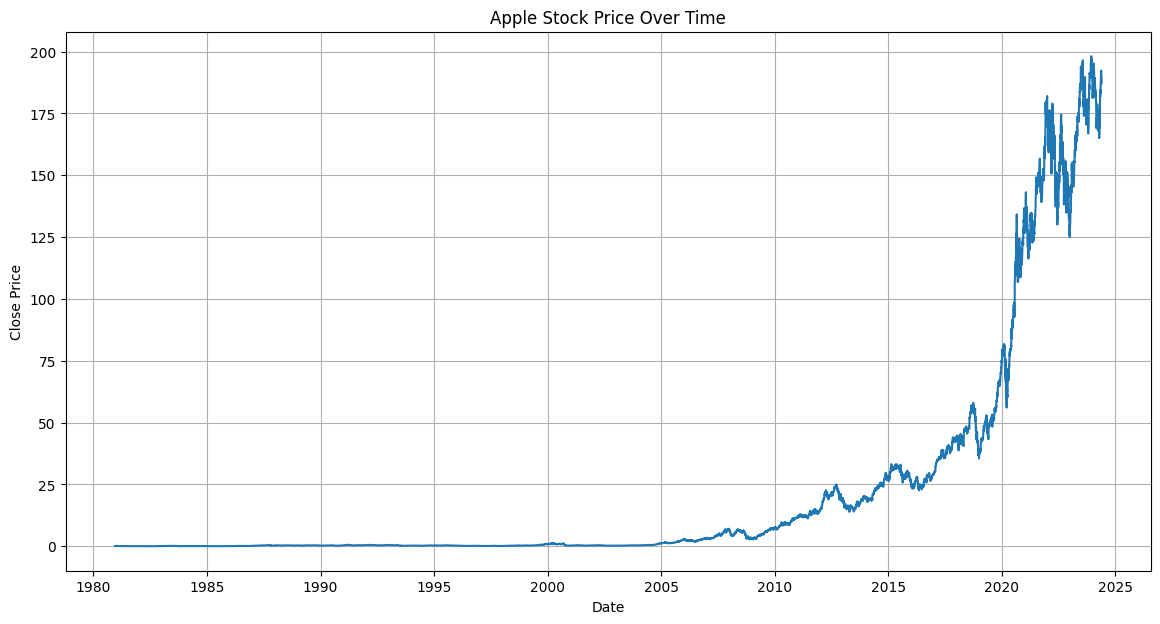

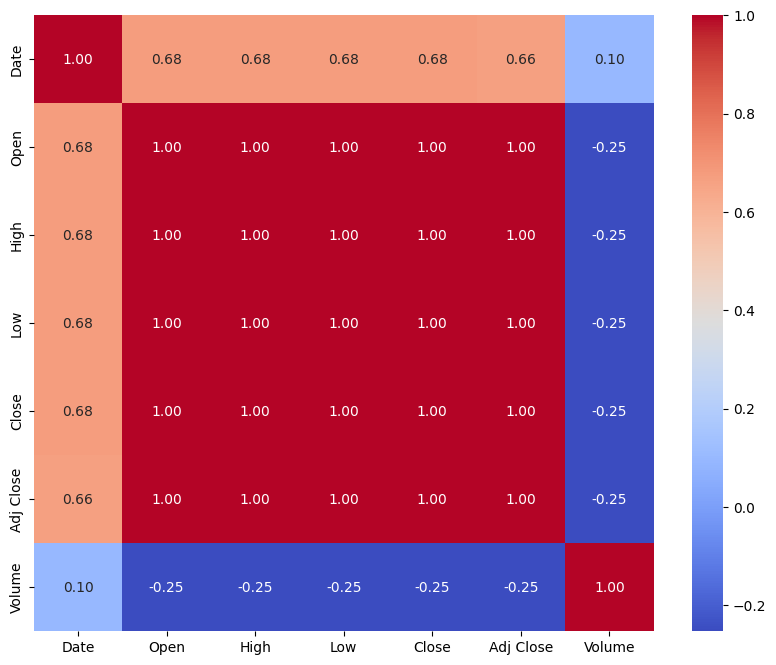

In [ ]:
# Visualiser les prix de clôture au fil du temps
plt.figure(figsize=(14, 7)) # Définit la taille de la figure
plt.plot(data['Date'], data['Close']) # Trace les données de prix de clôture par date
plt.title('Apple Stock Price Over Time') # Ajoute un titre au graphique
plt.xlabel('Date') # Ajoute une étiquette à l'axe des x
plt.ylabel('Close Price') # Ajoute une étiquette à l'axe des y
plt.grid(True) # Ajoute une grille pour faciliter la lecture
plt.show() # Affiche le graphique

# Visualiser la corrélation entre les variables
plt.figure(figsize=(10, 8)) #  Crée une nouvelle figure avec une taille spécifique de 10 pouces de large et 8 pouces de haut
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# Utilisation de la bibliothèque seaborn, créer une carte de chaleur (heatmap) représentant la matrice de corrélation des variables dans le DataFrame data
plt.show() # Affiche le graphique

Préparation des données pour la modélisation

In [ ]:
# Utiliser 'Close' comme variable cible
y = data['Close']

# Utiliser les autres colonnes comme caractéristiques
X = data.drop(['Date', 'Close'], axis=1)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entraînement et évaluation du modèle

In [ ]:
# Modélisation avec un RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation des performances du modèle
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.037735663990528495
R^2 Score: 0.9999810544253754


Optimisation et amélioration du modèle

In [ ]:
from sklearn.model_selection import GridSearchCV
# Définir les paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Évaluation des performances du meilleur modèle
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_best)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_best)}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.03824670206422619
R^2 Score: 0.9999807978535031
